# Blood Donation Analysis using Data Science Workflow
Following the methodology inspired by DataScienceDojo’s workflow:

## 1. Problem Definition
Predict whether a donor will donate again based on donation history and demographics.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## 2. Data Collection

In [49]:
url = 'https://raw.githubusercontent.com/baheldeepti/BloodDonation/main/Balanced_Blood_Donation_Dataset.csv'
df = pd.read_csv(url)
df.head()

,Recency,Frequency,Monetary,Time,Age,CampaignResponse,Target,Monetary_per_Donation,Donation_Intensity
0,48,7,3592,64,23,0,1,449.00,0.142857
1,7,4,2366,49,50,1,1,473.20,0.500000
2,27,3,1509,50,65,0,0,377.25,0.107143
3,6,3,1380,18,19,0,0,345.00,0.428571
4,12,4,1865,24,46,0,0,373.00,0.307692


## 3. Data Cleaning & Feature Engineering

In [51]:
df['Monetary_per_Donation'] = df['Monetary'] / (df['Frequency'] + 1)
df['Donation_Intensity'] = df['Frequency'] / (df['Recency'] + 1)
df.fillna(0, inplace=True)

## 4. Exploratory Data Analysis (EDA)

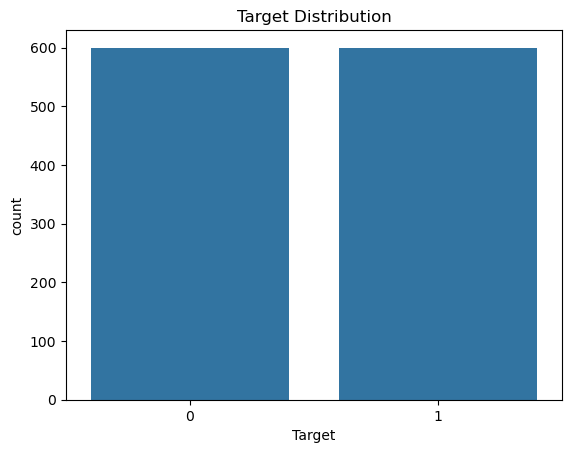

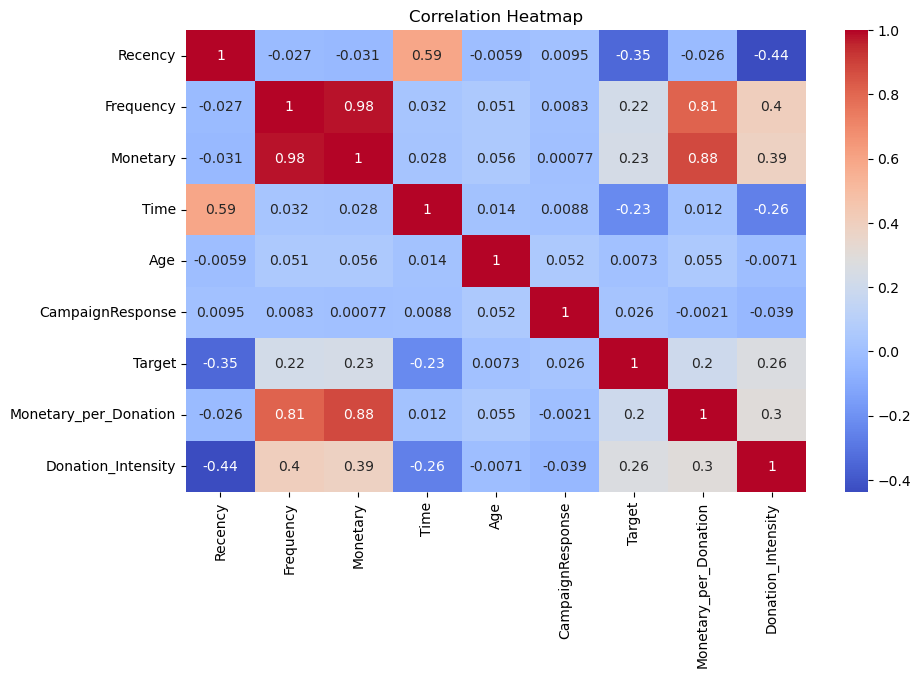

In [55]:
sns.countplot(x='Target', data=df)
plt.title('Target Distribution')
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 5. Modeling and Evaluation

In [57]:
features = ['Recency', 'Frequency', 'Time', 'Age',
            'CampaignResponse', 'Monetary_per_Donation', 'Donation_Intensity']
X = df[features]
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [63]:
from catboost import CatBoostClassifier
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })
pd.DataFrame(results).sort_values('ROC AUC', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
1,Random Forest,0.788889,0.775510,0.826087,0.800000,0.882257
5,CatBoost,0.791667,0.771144,0.842391,0.805195,0.848351
2,Gradient Boosting,0.738889,0.714286,0.815217,0.761421,0.799700
0,Logistic Regression,0.688889,0.700000,0.684783,0.692308,0.763680
4,Support Vector Machine,0.711111,0.710526,0.733696,0.721925,0.752702
6,Naive Bayes,0.675000,0.737589,0.565217,0.640000,0.751420
3,AdaBoost,0.661111,0.682353,0.630435,0.655367,0.729095


## 6. ROC Curve Visualization

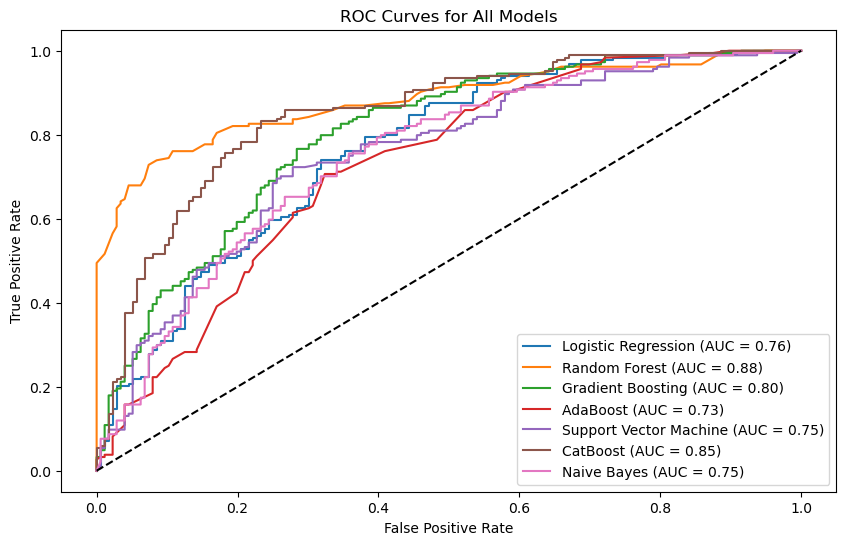

In [65]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

C:\Users\17654\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:02:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\17654\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:02:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Final Model Performance:
                 Model  CV ROC AUC  Test Accuracy  Test Precision  \
0      Voting Ensemble      0.8568         0.7917          0.7561   
1        Random Forest      0.8351         0.7917          0.7638   
2              XGBoost      0.7634         0.7778          0.7358   
3    Gradient Boosting      0.7375         0.7333          0.7079   
4  Logistic Regression      0.7217         0.6611          0.6611   
5          Naive Bayes      0.7177         0.6639          0.6954   
6                  SVM      0.7099         0.6889          0.6604   
7             AdaBoost      0.7057         0.6778          0.6538   

   Test Recall  Test F1 Score  Test ROC AUC  
0       0.8611         0.8052        0.8747  
1       0.8444         0.8021        0.8874  
2       0.8667         0.7959        0.8579  
3       0.7944         0.7487        0.8126  
4       0.6611         0.6611        0.7486  
5       0.5833         0.6344        0.7360  
6       0.7778         0.7143

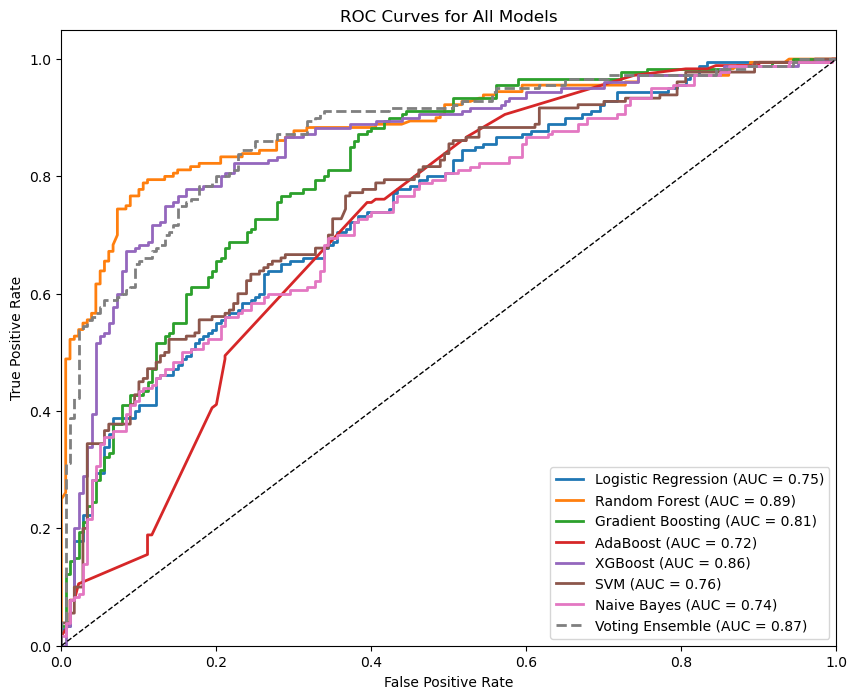

Saved Logistic Regression to saved_models\logistic_regression.pkl
Saved Random Forest to saved_models\random_forest.pkl
Saved Gradient Boosting to saved_models\gradient_boosting.pkl
Saved AdaBoost to saved_models\adaboost.pkl
Saved XGBoost to saved_models\xgboost.pkl
Saved SVM to saved_models\svm.pkl
Saved Naive Bayes to saved_models\naive_bayes.pkl
Saved Voting Ensemble to saved_models\voting_ensemble.pkl
All models zipped into models_bundle.zip


In [45]:
import pandas as pd
import numpy as np
import joblib
import os
import zipfile

from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, VotingClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# 0. Load the balanced dataset
url = (
    "https://raw.githubusercontent.com/"
    "baheldeepti/BloodDonation/main/Balanced_Blood_Donation_Dataset.csv"
)
df = pd.read_csv(url)

# 1. Feature Engineering
df['Monetary_per_Donation'] = df['Monetary'] / (df['Frequency'] + 1)
df['Donation_Intensity']    = df['Frequency'] / (df['Recency'] + 1)

# 2. Correlation-based Feature Selection
corr = df.drop(columns='Target').corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.90)]
df = df.drop(columns=to_drop)

# 3. Prepare features and target
X = df.drop(columns='Target')
y = df['Target']

# 4. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 5. Define models & hyperparameter grids
model_params = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000),
        {'classifier__C': [0.1, 1, 10]}
    ),
    'Random Forest': (
        RandomForestClassifier(),
        {'classifier__n_estimators': [100], 'classifier__max_depth': [5, 15]}
    ),
    'Gradient Boosting': (
        GradientBoostingClassifier(),
        {'classifier__n_estimators': [100], 'classifier__learning_rate': [0.05, 0.1]}
    ),
    'AdaBoost': (
        AdaBoostClassifier(),
        {'classifier__n_estimators': [100, 200]}
    ),
    'XGBoost': (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        {'classifier__n_estimators': [100], 'classifier__max_depth': [3, 5]}
    ),
    'SVM': (
        SVC(probability=True),
        {'classifier__C': [0.1, 1], 'classifier__kernel': ['rbf']}
    ),
    'Naive Bayes': (
        GaussianNB(),
        {}  # no hyperparameters
    )
}

results = []
trained_models = {}

# 6. Train, tune, CV-evaluate, and test-evaluate each model
for name, (estimator, params) in model_params.items():
    # Build pipeline with scaler + estimator
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', estimator)
    ])
    
    if params:
        grid = GridSearchCV(
            pipe, params, cv=5, scoring='roc_auc', n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        cv_auc = grid.best_score_
    else:
        pipe.fit(X_train, y_train)
        best_model = pipe
        cv_auc = cross_val_score(
            pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1
        ).mean()
    
    trained_models[name] = best_model
    
    # Test set evaluation
    y_pred = best_model.predict(X_test)
    if hasattr(best_model.named_steps['classifier'], "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        # fallback if no predict_proba
        y_proba = best_model.decision_function(X_test)
    
    results.append({
        'Model': name,
        'CV ROC AUC':      round(cv_auc, 4),
        'Test Accuracy':   round(accuracy_score(y_test, y_pred), 4),
        'Test Precision':  round(precision_score(y_test, y_pred), 4),
        'Test Recall':     round(recall_score(y_test, y_pred), 4),
        'Test F1 Score':   round(f1_score(y_test, y_pred), 4),
        'Test ROC AUC':    round(roc_auc_score(y_test, y_proba), 4)
    })

# 7. Build a Voting Ensemble of top 3 by CV ROC AUC
top3 = sorted(results, key=lambda x: x['CV ROC AUC'], reverse=True)[:3]
ensemble = VotingClassifier(
    estimators=[(r['Model'], trained_models[r['Model']]) for r in top3],
    voting='soft'
)
ensemble_pipe = Pipeline([('scaler', StandardScaler()), ('classifier', ensemble)])
ensemble_pipe.fit(X_train, y_train)

# Ensemble test evaluation
y_pred_e = ensemble_pipe.predict(X_test)
y_proba_e = ensemble_pipe.predict_proba(X_test)[:, 1]
ensemble_cv_auc = cross_val_score(
    ensemble_pipe, X, y, cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring='roc_auc', n_jobs=-1
).mean()

results.append({
    'Model': 'Voting Ensemble',
    'CV ROC AUC':      round(ensemble_cv_auc, 4),
    'Test Accuracy':   round(accuracy_score(y_test, y_pred_e), 4),
    'Test Precision':  round(precision_score(y_test, y_pred_e), 4),
    'Test Recall':     round(recall_score(y_test, y_pred_e), 4),
    'Test F1 Score':   round(f1_score(y_test, y_pred_e), 4),
    'Test ROC AUC':    round(roc_auc_score(y_test, y_proba_e), 4)
})

# 8. Display final results
df_results = pd.DataFrame(results).sort_values(
    by='CV ROC AUC', ascending=False
).reset_index(drop=True)

print("📊 Final Model Performance:")
print(df_results)

# 9. Plot ROC Curves for All Models
plt.figure(figsize=(10, 8))
for name, model in trained_models.items():
    if hasattr(model.named_steps['classifier'], "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

# Ensemble curve
fpr_e, tpr_e, _ = roc_curve(y_test, y_proba_e)
plt.plot(fpr_e, tpr_e, '--', lw=2, label=f"Voting Ensemble (AUC = {auc(fpr_e, tpr_e):.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

# 10. Create an output directory
os.makedirs("saved_models", exist_ok=True)

# 11. Dump each model to a .pkl file
for name, model in trained_models.items():
    # sanitize filename
    fname = name.lower().replace(" ", "_") + ".pkl"
    path  = os.path.join("saved_models", fname)
    joblib.dump(model, path)
    print(f"Saved {name} to {path}")

# Also save the ensemble
ensemble_path = os.path.join("saved_models", "voting_ensemble.pkl")
joblib.dump(ensemble_pipe, ensemble_path)
print(f"Saved Voting Ensemble to {ensemble_path}")

# 12. (Optional) Zip them up for easy download
zipf = zipfile.ZipFile("models_bundle.zip", "w", zipfile.ZIP_DEFLATED)
for root, _, files in os.walk("saved_models"):
    for file in files:
        zipf.write(os.path.join(root, file), arcname=file)
zipf.close()
print("All models zipped into models_bundle.zip")

NameError: name 'auc' is not defined

<Figure size 1000x800 with 0 Axes>